In [1]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

In [2]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets
y['income'] = y['income'].str.strip('.')
# metadata 
print(census_income.metadata)

# variable information
print(census_income.variables)
X.shape

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

C:\Users\manoh\AppData\Local\Temp\ipykernel_8876\1625378326.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].str.strip('.')


(48842, 14)

In [3]:
X = pd.DataFrame(X, columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                             'hours-per-week', 'native-country'])
y = pd.Series(y.to_numpy().ravel(), name = 'income')

print(X)
print(y)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [4]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
print("Missing values in features:\n", X.isna().sum())
print("\nMissing values in target:", y.isna().sum())
#X.shape

for col in X.columns:
    print((col, len(X[X[col] == '?']) / len(X[col]) * 100))

valid_indices = ~(X.isna().any(axis=1) | y.isna())
X = X[valid_indices]
y = y[valid_indices]

Missing values in features:
 age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

Missing values in target: 0
('age', 0.0)
('workclass', 3.759059825559969)
('fnlwgt', 0.0)
('education', 0.0)
('education-num', 0.0)
('marital-status', 0.0)
('occupation', 3.773391752999468)
('relationship', 0.0)
('race', 0.0)
('sex', 0.0)
('capital-gain', 0.0)
('capital-loss', 0.0)
('hours-per-week', 0.0)
('native-country', 1.1936448138896851)


In [6]:
print("Missing values in features:\n", X.isna().sum())
print("\nMissing values in target:", y.isna().sum())
X.shape

Missing values in features:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

Missing values in target: 0


(47621, 14)

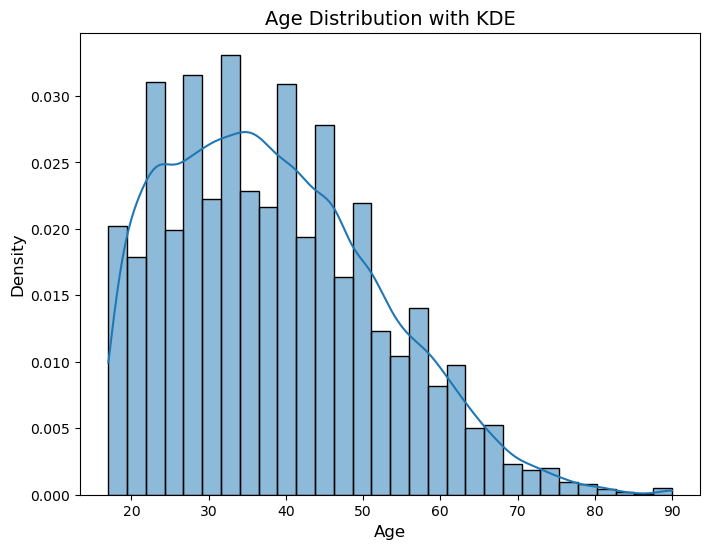

In [28]:
plt.figure(figsize = (8, 6))
sns.histplot(data = X, x = 'age', kde = True, stat = "density", bins = 30)
plt.title("Age Distribution with KDE", fontsize = 14)
plt.xlabel("Age", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.show()

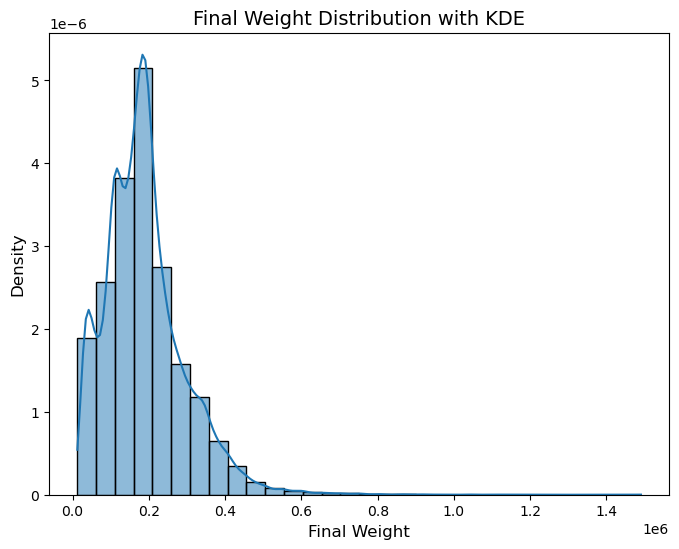

In [29]:
plt.figure(figsize = (8, 6))
sns.histplot(data = X, x = 'fnlwgt', kde = True, stat = "density", bins = 30)
plt.title("Final Weight Distribution with KDE", fontsize = 14)
plt.xlabel("Final Weight", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.show()

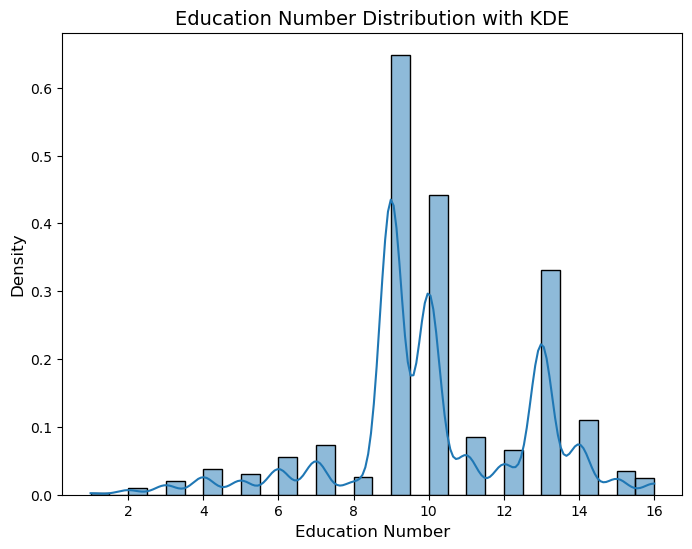

In [30]:
plt.figure(figsize = (8, 6))
sns.histplot(data = X, x = 'education-num', kde = True, stat = "density", bins = 30)
plt.title("Education Number Distribution with KDE", fontsize = 14)
plt.xlabel("Education Number", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.show()

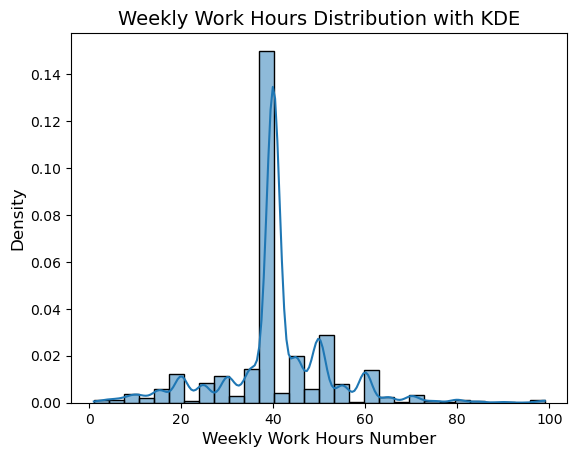

In [31]:
sns.histplot(data = X, x = 'hours-per-week', kde = True, stat = "density", bins = 30)
plt.title("Weekly Work Hours Distribution with KDE", fontsize = 14)
plt.xlabel("Weekly Work Hours Number", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.show()

In [11]:
numerical_features = [col for col in X.columns if X[col].dtype != object]
categorical_features = [col for col in X.columns if X[col].dtype == object]
print(numerical_features)
print(categorical_features)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


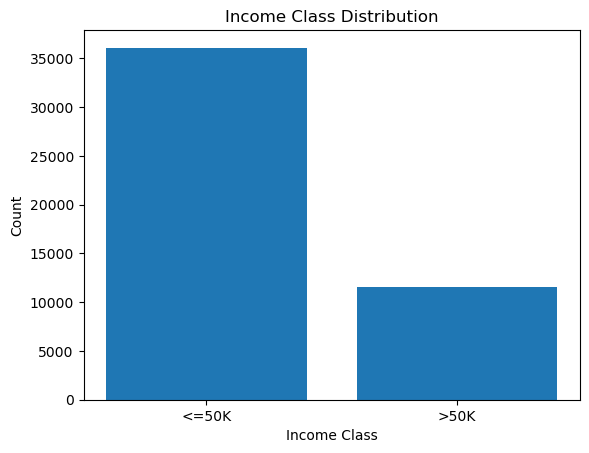

In [32]:
grouped_counts = y.value_counts()
plt.bar(grouped_counts.index, grouped_counts.values)
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.title('Income Class Distribution')
plt.show()

<Axes: >

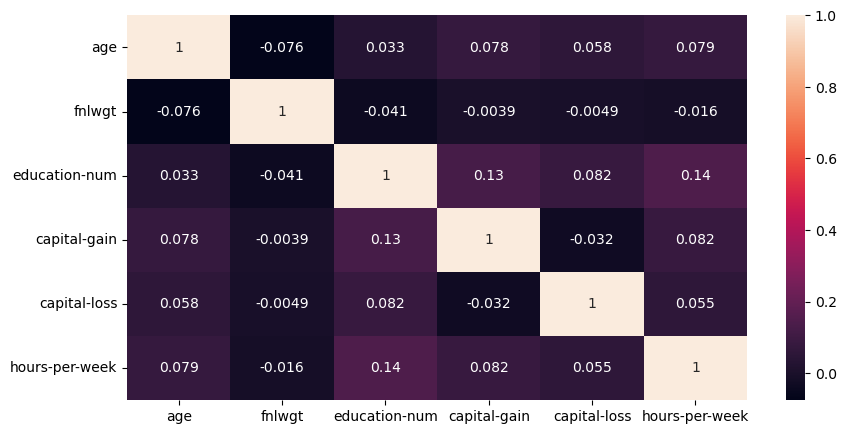

In [15]:
plt.figure(figsize = (10, 5))
sns.heatmap(X[numerical_features].corr(), annot = True)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [42]:
hot_encoder = OneHotEncoder(sparse_output = False)
encoded_categorical = hot_encoder.fit_transform(X[categorical_features])
encoded_feature_names = hot_encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_categorical, columns = encoded_feature_names, index = X.index)
df_final = pd.concat([X.drop(columns = categorical_features), encoded_df], axis = 1)
print(df_final.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0          0.0                    0.0                  0.0   
1          0.0                    0.0                  0.0   
2          0.0                    0.0                  0.0   
3          0.0                    0.0                  0.0   
4          0.0                    0.0                  0.0   

   workclass_Never-worked  ...  native-country_Portugal  \
0                     0.0  ...                      0.0   
1                     0.0  ...                

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)
model_logr = LogisticRegression(random_state=1, max_iter=1000)
model_logr.fit(X_train, y_train)
pred_logr = model_logr.predict(X_test)
print('Logistic Regression accuracy score:{0:0.3f}'. format(accuracy_score(y_test, pred_logr)))

ValueError: could not convert string to float: 'Federal-gov'